### Abstract

This is an example to show to use use the basic API of TensorFlow, to construct a linear regression model. 

This notebook is an exercise adapted from [the Medium.com blog](https://medium.com/@saxenarohan97/intro-to-tensorflow-solving-a-simple-regression-problem-e87b42fd4845).

Note that recent version of TensorFlow does have more advanced API such like LinearClassifier that provides the scikit-learn alike machine learning API.

In [84]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

Split the data into training, validation and test sets.

In [114]:
# Retrieve the data
bunch = load_boston()
print('total data shape:', bunch.data.shape)

total_features = bunch.data[:, range(12)]
total_prices = bunch.data[:, [12]]

print('features shape:', total_features.shape, 'targe shape:', total_prices.shape)

# new in 0.18 version
# total_features, total_prices = load_boston(True)

# Keep 300 samples for training
train_features = scale(total_features[:300])
train_prices = total_prices[:300]
print('training dataset:', len(train_features))
print('feature example:', train_features[0:1])
print('mean of feature 0:', np.asarray(train_features[:, 0]).mean())

# Keep 100 samples for validation
valid_features = scale(total_features[300:400])
valid_prices = total_prices[300:400]
print('validation dataset:', len(valid_features))

# Keep remaining samples as test set
test_features = scale(total_features[400:])
test_prices = total_prices[400:]
print('test dataset:', len(test_features))

total data shape: (506, 13)
features shape: (506, 12) targe shape: (506, 1)
training dataset: 300
feature example: [[-0.64113113  0.10080399 -1.03067021 -0.31448545  0.217757    0.21942717
   0.08260981 -0.09559716 -2.15826599 -0.23254428 -1.00268807  0.42054571]]
mean of feature 0: 2.36847578587e-17
validation dataset: 100
test dataset: 106


#### Linear Regression Model 

In [42]:
w = tf.Variable(tf.truncated_normal([12, 1], mean=0.0, stddev=1.0, dtype=tf.float64))
b = tf.Variable(tf.zeros(1, dtype = tf.float64))

In [43]:
def calc(x, y):
    '''
        linear regression model that return (prediction, L2_error)
    '''
    # Returns predictions and error
    predictions = tf.add(b, tf.matmul(x, w))
    error = tf.reduce_mean(tf.square(y - predictions))
    return [ predictions, error ]

In [140]:
y, cost = calc(train_features, train_prices)

# augment the model with the regularisation
L1_regu_cost = tf.add(cost, tf.reduce_mean(tf.abs(w)))
L2_regu_cost = tf.add(cost, tf.reduce_mean(tf.square(w)))

In [151]:
def train(cost, learning_rate=0.025, epochs=300):
    '''
        run the cost computation graph with gradient descent optimizer.
    '''
    errors = [[], []] 

    init = tf.global_variables_initializer()

    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    config = tf.ConfigProto()
    config.gpu_options.allow_growth=True
    sess = tf.Session(config=config)

    with sess:
        sess.run(init)

        for i in range(epochs):

            sess.run(optimizer)

            errors[0].append(i+1)
            errors[1].append(sess.run(cost))

        # Get the parameters of the linear regression model.
        print('weights:\n', sess.run(w))
        print('bias:', sess.run(b))
    
        valid_cost = calc(valid_features, valid_prices)[1]
        print('Validation error =', sess.run(valid_cost), '\n')

        test_cost = calc(test_features, test_prices)[1]
        print('Test error =', sess.run(test_cost), '\n')
    
    return errors

In [174]:
# with L1 regularisation, the testing error is slightly improved, i.e. 75 vs. 76
# similarly with L1 regularisation, the L2 regularisation improves the testing error to 75 as well.
epochs = 500

errors_lr_005 = train(cost, learning_rate=0.005, epochs=epochs)

errors_lr_025 = train(cost, learning_rate=0.025, epochs=epochs)

weights:
 [[ 0.01976278]
 [ 0.2216641 ]
 [ 0.33897141]
 [ 0.14712622]
 [ 1.49651714]
 [-3.30264682]
 [ 2.19215736]
 [ 0.75213107]
 [-0.2088241 ]
 [-0.35450866]
 [ 0.65472403]
 [ 0.07399816]]
bias: [ 10.63383511]
Validation error = 39.140050724 

Test error = 76.3269062042 

weights:
 [[ 0.40265458]
 [ 0.38716099]
 [ 0.40915654]
 [ 0.11570143]
 [ 0.7819646 ]
 [-3.46135321]
 [ 2.58540755]
 [ 0.64041114]
 [-0.13593196]
 [-0.43936893]
 [ 0.54024542]
 [ 0.12436986]]
bias: [ 10.70416667]
Validation error = 37.305764913 

Test error = 75.9908063646 



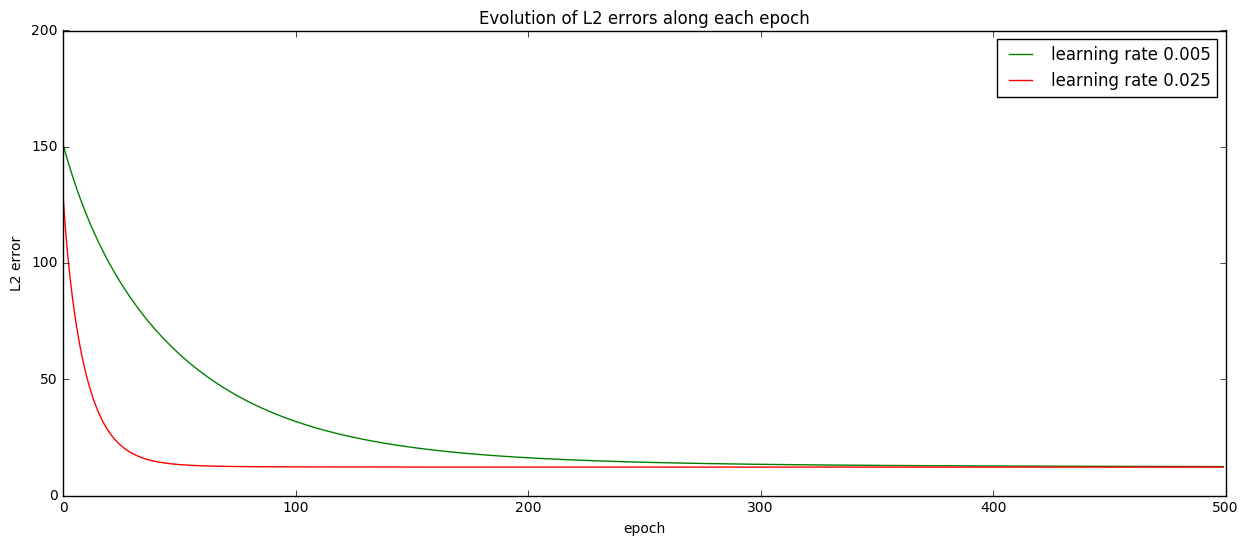

In [173]:
ax = plt.subplot(111)

plt.plot(errors_lr_005[1], color='green', label='learning rate 0.005')
plt.plot(errors_lr_025[1], color='red', label='learning rate 0.025')

#ax = plt.plot(errors[0], errors[1], 'r--')

plt.axis([0, epochs, 0, 200])

plt.title('Evolution of L2 errors along each epoch')
plt.xlabel('epoch')
plt.ylabel('L2 error')
_ = plt.legend(loc='best')

plt.show()

The **higher** the learning rate, the **faster** that the model converges. But if the learning rate is too large, it could also prevent the model from convergence.